## **Условие задания**

Вы - сотрудник отдела аналитики крупной компании.

Ваша компания занимается продвижением товаров и услуг в соцсетях: ВКонтакте, Facebook, Instagram и TikTok.

Руководитель отдела в курсе, что Вы знаете стандартный язык Python и доверил Вам анализ группы в соцсети.
Это одна из групп, которую вскоре планируется задействовать для продвижения нового товара.

Руководитель просит предоставить наглядный отчет в Jupyter Notebook с графиками.

Детали отчета остаются на Ваше усмотрение.

Задачи, которые сформулировал руководитель:

1) определить статистику посещаемости группы (просмотры/посещения в год); 

2) провести анализ охвата аудитории (reach/reach_subscribers);

3) провести анализ демографии (пол - gender, возраст аудитории - age, gender_age, страна - countries);

4) провести анализ обратной связи.

5) обосновать, подходит ли данная группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?

До старта рекламной кампании остается совсем немного времни. 

**ВНИМАНИЕ**: про данные статистики ВК [тут](https://vk.com/dev/objects/stats_format), про виральный охватат [тут](https://vk.com/@adminsclub-viral-reach)

## **Данные**

In [74]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
df.head()

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [0]:
dfСriterion = pd.get_dummies(df, columns=['Критерий'])

In [78]:
dfСriterion

,Дата,Парам. №1,Парам. №2,Значение,Критерий_activity,Критерий_age,Критерий_cities,Критерий_countries,Критерий_feedback,Критерий_gender,Критерий_gender_age,Критерий_members,Критерий_reach,Критерий_reach_subscribers,Критерий_reach_viral,Критерий_sections,Критерий_views,Критерий_visitors
0,15.03.2020,NaN,NaN,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15.03.2020,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15.03.2020,М,NaN,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,15.03.2020,24-27,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,15.03.2020,30-35,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46407,02.08.2016,NaN,NaN,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0
46408,02.08.2016,NaN,NaN,109,0,0,0,0,0,0,0,0,0,0,1,0,0,0
46409,01.08.2016,NaN,NaN,203,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46410,01.08.2016,NaN,NaN,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## **Задание №1**

In [0]:
viewersDates = dfСriterion[['Дата', 'Значение']][dfСriterion['Критерий_views'] == 1] # Отбираем только те строки, где содержиться информация о просмотрах

In [0]:
def convert_to_datetime(row):
  return datetime.strptime(row['Дата'], '%d.%m.%Y')

In [81]:
viewersDates['Дата'] = viewersDates.apply(convert_to_datetime, axis=1) # Конвертируем колонку с датам в datetime
viewersDates.head()

,Дата,Значение
0,2020-03-15,4
10,2020-03-14,14
32,2020-03-13,16
51,2020-03-12,17
73,2020-03-11,13


In [0]:
viewersDates['Дата'] = viewersDates['Дата'].dt.strftime('%Y') # Забираем из даты только год

In [0]:
seriesViwersPerYear = viewersDates.groupby(['Дата'])['Значение'].sum() # Группируем данные по году и получаем суммарное значение просмотров за год

### *График №1*

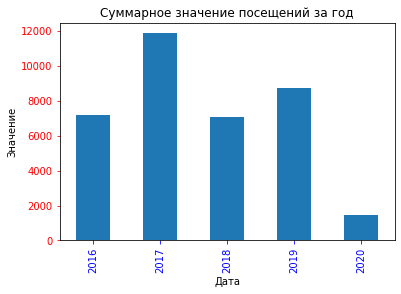

In [84]:
plt.title('Суммарное значение посещений за год')
plt.ylabel('Значение')
plt.xlabel('Дата')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

seriesViwersPerYear.plot.bar()
plt.show()

### *График №2*

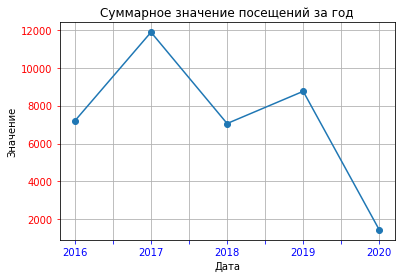

In [103]:
plt.title('Суммарное значение посещений за год')
plt.ylabel('Значение')
plt.xlabel('Дата')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

seriesViwersPerYear.plot(marker='o')
plt.grid(True)
plt.show()

## **Задание №2**

### *Делам охват аудитории за месяц*

In [0]:
audienceReach = dfСriterion[['Дата','Значение']][dfСriterion['Критерий_reach'] == 1] # Отбираем только те строки, где содержиться информация о полном охвате

In [135]:
audienceReach['Дата'] = audienceReach.apply(convert_to_datetime, axis=1) # Конвертируем колонку с датам в datetime
audienceReach.head()

,Дата,Значение
42453,2020-03-15,6
42456,2020-03-14,16
42459,2020-03-13,12
42462,2020-03-12,16
42465,2020-03-11,17


In [136]:
audienceReach['Дата'] = audienceReach['Дата'].dt.strftime('%Y-%m') # Забираем из даты только год и месяц
audienceReach.head()

,Дата,Значение
42453,2020-03,6
42456,2020-03,16
42459,2020-03,12
42462,2020-03,16
42465,2020-03,17


In [0]:
seriesReachPerMonth = audienceReach.groupby(['Дата'])['Значение'].sum() # Группируем данные по дате

**Тестовый график**

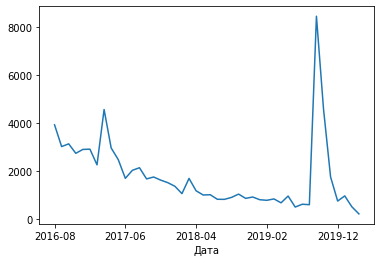

In [289]:
seriesReachPerMonth.plot()
plt.show()

### *Делаем охват подписчиков за месяц*

In [0]:
audienceReachSubscribers = dfСriterion[['Дата','Значение']][dfСriterion['Критерий_reach_subscribers'] == 1] # Отбираем только те строки, где содержиться информация о охвате подписчиков

In [141]:
audienceReachSubscribers['Дата'] = audienceReachSubscribers.apply(convert_to_datetime, axis=1) # Конвертируем колонку с датам в datetime
audienceReachSubscribers.head()

,Дата,Значение
42454,2020-03-15,3
42457,2020-03-14,5
42460,2020-03-13,3
42463,2020-03-12,4
42466,2020-03-11,3


In [143]:
audienceReachSubscribers['Дата'] = audienceReachSubscribers['Дата'].dt.strftime('%Y-%m') # Забираем из даты только год и месяц
audienceReachSubscribers.head()

,Дата,Значение
42454,2020-03,3
42457,2020-03,5
42460,2020-03,3
42463,2020-03,4
42466,2020-03,3


In [0]:
seriesReachSubscribersPerMonth = audienceReachSubscribers.groupby(['Дата'])['Значение'].sum() # Группируем данные по дате

**Тестовый график**

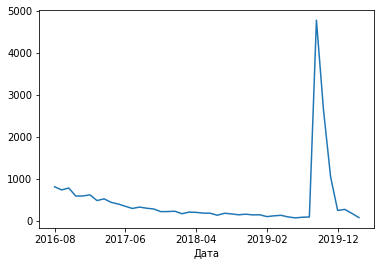

In [290]:
seriesReachSubscribersPerMonth.plot()
plt.show()

### *Объединяем данные и получаем график*

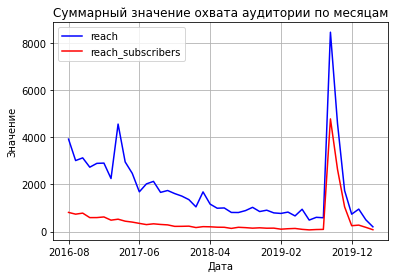

In [276]:
plt.title('Суммарный значение охвата аудитории по месяцам')
plt.ylabel('Значение')
plt.xlabel('Дата')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

seriesReachPerMonth.plot(label="reach", color = 'b')
seriesReachSubscribersPerMonth.plot(label = "reach_subscribers", color = 'r')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

## **Задание №3**

### *Анализ гендерное предрасположенности (или по простому - пола)*

In [167]:
genderData = dfСriterion[['Дата', 'Значение','Парам. №1']][dfСriterion['Критерий_gender'] == 1] # Отбираем только те строки, где содержиться информация о поле
genderData.head()

,Дата,Значение,Парам. №1
2,15.03.2020,3,М
12,14.03.2020,1,Ж
13,14.03.2020,8,М
34,13.03.2020,1,Ж
35,13.03.2020,5,М


In [170]:
genderSeries = genderData.groupby(['Парам. №1'])['Значение'].sum()
genderSeries

Парам. №1
Ж    10063
М    12637
Name: Значение, dtype: int64

**Расчитываем процентное соотношение посещений**

In [0]:
allGenders = 10063 + 12637
mGender = 'Мужчины: ' + str(round(12637 * 100 / allGenders)) + '%'
gGender = 'Женщины: ' + str(round(10063 * 100 / allGenders)) + '%'

**График**

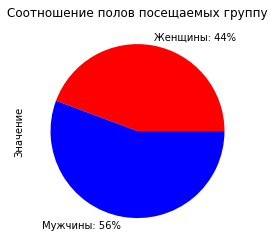

In [191]:
plt.title('Соотношение полов посещаемых группу')
genderSeries.plot.pie(labels = (gGender,mGender),colors = ('r','b'))
plt.show()

### *Анализ возраста аудитории*

In [195]:
ageData = dfСriterion[['Парам. №1', 'Значение']][dfСriterion['Критерий_age'] == 1] # Отбираем только те строки, где содержиться информация о возрасте
ageData.head()

,Парам. №1,Значение
3,24-27,1
4,30-35,2
14,24-27,1
15,27-30,4
16,30-35,1


In [197]:
ageSeries = ageData.groupby(['Парам. №1'])['Значение'].sum()
ageSeries

Парам. №1
1-18      741
18-21    3046
21-24    2560
24-27    1751
27-30    2419
30-35    3466
35-45    2402
45+      2350
Name: Значение, dtype: int64

**График**

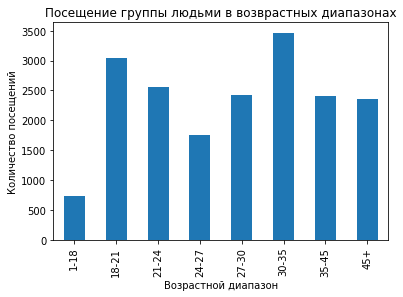

In [204]:
ageSeries.plot.bar()
plt.title('Посещение группы людьми в возврастных диапазонах')
plt.xlabel('Возрастной диапазон')
plt.ylabel('Количество посещений')
plt.show()

### *Анализ страны пользователей*

In [212]:
countryData = dfСriterion[['Парам. №1','Значение']][dfСriterion['Критерий_countries'] == 1] # Отбираем только те строки, где содержиться информация о страных
countryData.head()

,Парам. №1,Значение
9,Россия,3
27,Россия,8
28,Украина,1
29,Беларусь,1
45,Россия,5


In [226]:
countrySeries = countryData.groupby(['Парам. №1'])['Значение'].sum()
countrySeries

Парам. №1
Австралия                       1
Австрия                         7
Азербайджан                    19
Аргентина                       1
Армения                         8
                               ..
Шри-Ланка                       1
Эстония                        28
Южная Корея                     3
Южно-Африканская Республика     1
Япония                          2
Name: Значение, Length: 70, dtype: int64

**График**

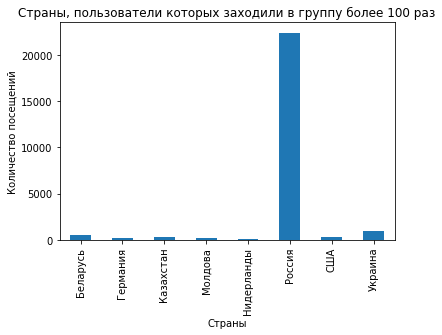

In [230]:
countrySeries[countrySeries > 100].plot.bar()
plt.title('Страны, пользователи которых заходили в группу более 100 раз')
plt.xlabel('Страны')
plt.ylabel('Количество посещений')
plt.show()

## **Задание №4**

In [243]:
feedbackData = dfСriterion[['Дата','Парам. №1','Значение']][dfСriterion['Критерий_feedback'] == 1] # Отбираем только те строки, где содержиться информация об обратной связи
feedbackData

,Дата,Парам. №1,Значение
49,13.03.2020,Нравится,2
70,12.03.2020,Нравится,1
117,10.03.2020,Нравится,2
386,26.02.2020,Нравится,1
387,26.02.2020,Рассказали друзьям,1
...,...,...,...
42342,03.08.2016,Нравится,3
42394,02.08.2016,Нравится,1
42395,02.08.2016,Комментарии,1
42449,01.08.2016,Нравится,4


In [244]:
feedbackData['Дата'] = feedbackData.apply(convert_to_datetime, axis=1) # Конвертируем колонку с датам в datetime
feedbackData.head()

,Дата,Парам. №1,Значение
49,2020-03-13,Нравится,2
70,2020-03-12,Нравится,1
117,2020-03-10,Нравится,2
386,2020-02-26,Нравится,1
387,2020-02-26,Рассказали друзьям,1


In [245]:
feedbackData['Дата'] = feedbackData['Дата'].dt.strftime('%Y-%m') # Забираем из даты только год и месяц
feedbackData.head()

,Дата,Парам. №1,Значение
49,2020-03,Нравится,2
70,2020-03,Нравится,1
117,2020-03,Нравится,2
386,2020-02,Нравится,1
387,2020-02,Рассказали друзьям,1


In [250]:
feedbackData['Парам. №1'].value_counts()

Нравится              683
Рассказали друзьям    291
Комментарии            91
Упоминания              1
Name: Парам. №1, dtype: int64

### *Анализ лайков*

In [260]:
feedbackLike = feedbackData[feedbackData['Парам. №1'] == 'Нравится']
feedbackLike.head()

,Дата,Парам. №1,Значение
49,2020-03,Нравится,2
70,2020-03,Нравится,1
117,2020-03,Нравится,2
386,2020-02,Нравится,1
436,2020-02,Нравится,2


In [0]:
seriesFeedbackLike = feedbackLike.groupby(['Дата'])['Значение'].sum()

**График**

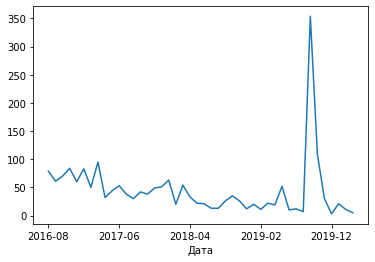

In [262]:
seriesFeedbackLike.plot()
plt.show()

### *Анализ репостов*

In [263]:
feedbackRepost = feedbackData[feedbackData['Парам. №1'] == 'Рассказали друзьям']
feedbackRepost.head()

,Дата,Парам. №1,Значение
387,2020-02,Рассказали друзьям,1
750,2020-02,Рассказали друзьям,1
1270,2020-01,Рассказали друзьям,1
1410,2020-01,Рассказали друзьям,3
1559,2020-01,Рассказали друзьям,1


In [0]:
seriesFeedbackRepost = feedbackRepost.groupby(['Дата'])['Значение'].sum()

**График**

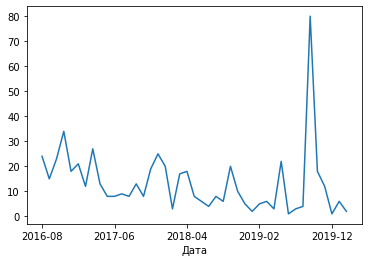

In [265]:
seriesFeedbackRepost.plot()
plt.show()

### *Анализ комментариев*

In [266]:
feedbackComments = feedbackData[feedbackData['Парам. №1'] == 'Комментарии']
feedbackComments.head()

,Дата,Парам. №1,Значение
681,2020-02,Комментарии,1
989,2020-02,Комментарии,1
1015,2020-01,Комментарии,2
1064,2020-01,Комментарии,6
1246,2020-01,Комментарии,1


In [0]:
seriesFeedbackComments = feedbackComments.groupby(['Дата'])['Значение'].sum()

**График**

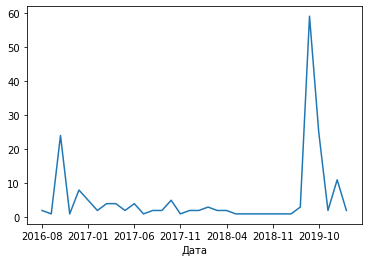

In [269]:
seriesFeedbackComments.plot()
plt.show()

### *Объединени данных*

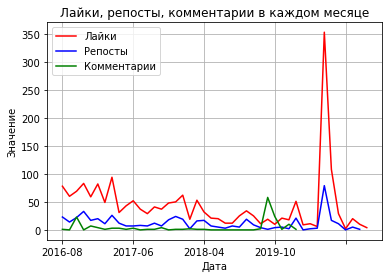

In [279]:
plt.title('Лайки, репосты, комментарии в каждом месяце')
plt.ylabel('Значение')
plt.xlabel('Дата')

seriesFeedbackLike.plot(label = "Лайки", color = 'r')
seriesFeedbackRepost.plot(label = "Репосты", color = 'b')
seriesFeedbackComments.plot(label = "Комментарии", color = 'g')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

## **Задание №5**

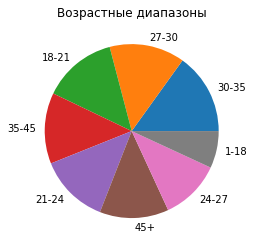

In [303]:
ageData['Парам. №1'].value_counts(normalize = True).plot.pie()
plt.title('Возрастные диапазоны')
plt.ylabel('')
plt.show()

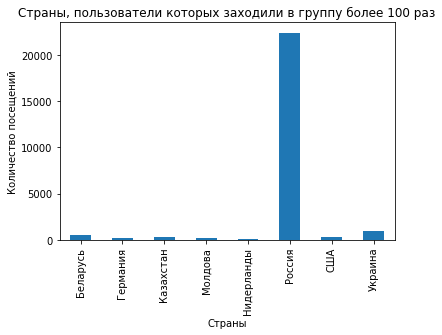

In [304]:
countrySeries[countrySeries > 100].plot.bar()
plt.title('Страны, пользователи которых заходили в группу более 100 раз')
plt.xlabel('Страны')
plt.ylabel('Количество посещений')
plt.show()

**Ответ:** Исходя из этих графиков можно убедиться, что большинство пользователей группы заходят из России. Исходя из диаграммы выше и графика в задании №3 можно видеть, что пользователи моложе 30 лет являются большинством данной группы. Именно поэтому данная группа подходит для продвижения товара.